In [43]:
import pygmt
import pandas as pd
import numpy as np
from obspy.clients.fdsn import Client
from obspy.core.utcdatetime import UTCDateTime
import datetime



In [44]:
# Load the catalogs 
matched_events_mycatalog= pd.read_csv('../data/matched_events_with_morton_mycatalog.csv')
unmatched_events_mycatalog= pd.read_csv('../data/new_events.csv')
unmatched_events_morton= pd.read_csv('../data/missing_events_from_mycatalog_morton.csv')
matched_events_morton= pd.read_csv('../data/matched_events_with_mycatalog_morton.csv')


In [45]:
# USGS catalog
client = Client("USGS")
# client_waveforms = WaveformClient()
events_USGS = client.get_events(starttime = UTCDateTime("2012-10-01T00:00:00.000000"),
                  endtime   = UTCDateTime("2012-10-31T23:59:59.999999"),
                  minlatitude=40,minlongitude=-127,maxlatitude=50,maxlongitude=-123)
events_USGS

88 Event(s) in Catalog:
2012-10-31T15:29:52.780000Z | +40.974, -123.700 | 3.21 mw | manual
2012-10-29T16:13:12.370000Z | +48.249, -123.156 | 0.57 md | manual
...
2012-10-02T02:56:59.840000Z | +40.329, -125.431 | 2.78 md | manual
2012-10-02T02:37:36.170000Z | +40.324, -125.394 | 2.79 md | manual
To see all events call 'print(CatalogObject.__str__(print_all=True))'

In [46]:
len(matched_events_morton),len(matched_events_mycatalog)

(88, 88)

In [47]:
# Print matched_events_mycatalog
matched_events_mycatalog

Unnamed: 0.1  Unnamed: 0   idx                              time  \
0              0           0     0  2012-10-01 04:32:56.834786+00:00   
1              1         271    16  2012-10-01 23:30:57.202589+00:00   
2              2         514    24  2012-10-02 04:25:45.218111+00:00   
3              3         594    26  2012-10-02 05:16:27.257156+00:00   
4              4         645    27  2012-10-02 06:17:18.197502+00:00   
..           ...         ...   ...                               ...   
83            83       14825   936  2012-10-28 02:41:20.201347+00:00   
84            84       15434   978  2012-10-30 01:39:09.445605+00:00   
85            85       15973  1013  2012-10-31 04:38:08.779493+00:00   
86            86       16149  1026  2012-10-31 15:29:52.919409+00:00   
87            87       16188  1027  2012-10-31 16:13:42.118762+00:00   

             x           y          z  picks   latitude   longitude  \
0   -36.801756 -416.426130  37.890625     21  40.750478 -125.935772   
1    59.644226 -431.982195  37.890625     26  40.609066 -124.795241   
2    28.341582 -428.392334  41.015625     50  40.643057 -125.164944   
3    80.794660 -434.375436  46.484375     51  40.585722 -124.545662   
4     8.037165 -449.931502  39.453125     35  40.449537 -125.405257   
..         ...         ...        ...    ...        ...         ...   
83   36.801756 -457.111224  21.484375     11  40.384106 -125.066598   
84  121.403495 -397.280203  33.984375     25  40.914702 -124.058921   
85   25.803530 -452.324742  17.578125     14  40.427623 -125.195924   
86  136.631808 -385.313999  49.609375     39  41.020011 -123.875584   
87   73.180504 -430.785575  46.484375     28  40.618754 -124.635172   

        depth  event_idx  pick_idx  residual station phase     time_pick  \
0   37.890625          0    153772  0.891797   FS01B     P  1.349066e+09   
1   37.890625         16    153845  0.340990   FS01B     P  1.349134e+09   
2   41.015625         24    166429 -0.050936   FS01B     P  1.349152e+09   
3   46.484375         26    166436  0.155608   FS01B     P  1.349155e+09   
4   39.453125         27    166440 -0.393561   FS01B     P  1.349159e+09   
..        ...        ...       ...       ...     ...   ...           ...   
83  21.484375        936    246816 -0.747185   FS01B     P  1.351392e+09   
84  33.984375        978    301864 -1.276993   FS01B     P  1.351561e+09   
85  17.578125       1013    152894 -0.798420   FS01B     P  1.351658e+09   
86  49.609375       1026    215028  0.182785     DBO     P  1.351697e+09   
87  46.484375       1027    152941 -0.227939   FS01B     P  1.351700e+09   

                            datetime  
0   2012-10-01 04:32:56.834786+00:00  
1   2012-10-01 23:30:57.202589+00:00  
2   2012-10-02 04:25:45.218111+00:00  
3   2012-10-02 05:16:27.257156+00:00  
4   2012-10-02 06:17:18.197502+00:00  
..                               ...  
83  2012-10-28 02:41:20.201347+00:00  
84  2012-10-30 01:39:09.445605+00:00  
85  2012-10-31 04:38:08.779493+00:00  
86  2012-10-31 15:29:52.919409+00:00  
87  2012-10-31 16:13:42.118762+00:00  

[88 rows x 18 columns]

In [48]:
matched_events_morton

Unnamed: 0  CI YEAR       TSTRING    YEAR  MONTH   DAY  HOUR  MINUTE  \
0            0      2.0  2.012100e+13  2012.0   10.0   1.0   4.0    32.0   
1            1      2.0  2.012100e+13  2012.0   10.0   1.0  23.0    30.0   
2            2      2.0  2.012100e+13  2012.0   10.0   2.0   4.0    25.0   
3            3      2.0  2.012100e+13  2012.0   10.0   2.0   5.0    16.0   
4            4      2.0  2.012100e+13  2012.0   10.0   2.0   6.0    17.0   
..         ...      ...           ...     ...    ...   ...   ...     ...   
83          83      2.0  2.012103e+13  2012.0   10.0  28.0   2.0    41.0   
84          84      2.0  2.012103e+13  2012.0   10.0  30.0   1.0    39.0   
85          85      2.0  2.012103e+13  2012.0   10.0  31.0   4.0    38.0   
86          86      2.0  2.012103e+13  2012.0   10.0  31.0  15.0    29.0   
87          87      2.0  2.012103e+13  2012.0   10.0  31.0  16.0    13.0   

    SECOND      LAT  ...  dist to nearest stn  tt RMS  ERH   ERZ  STRIKE  \
0    57.05  40.7190  ...                 34.0    0.46  2.6  29.2     NaN   
1    58.38  40.5787  ...                 11.8    0.34  6.9   5.8     NaN   
2    46.37  40.5592  ...                 24.1    0.30  1.7   5.0     NaN   
3    28.35  40.5075  ...                  7.3    0.35  1.1   1.2     NaN   
4    18.88  40.4213  ...                 31.2    0.46  1.4  34.8  316.59   
..     ...      ...  ...                  ...     ...  ...   ...     ...   
83   18.94  40.3640  ...                  3.8    0.11  1.4   1.1     NaN   
84   10.08  40.8998  ...                  9.6    0.22  1.7   1.2     NaN   
85    7.30  40.3762  ...                  8.7    0.12  1.7   0.5     NaN   
86   52.65  41.0058  ...                 15.3    0.06  0.6   0.9     NaN   
87   44.48  40.5008  ...                  6.9    0.11  1.0   1.2     NaN   

      DIP   RAKE  PLATE DESIGNATION  TEMPLATE EVENT?  \
0     NaN    NaN  Seaward of Trench              NaN   
1     NaN    NaN               Slab              NaN   
2     NaN    NaN  Seaward of Trench              NaN   
3     NaN    NaN               Slab              NaN   
4   43.54 -85.95  Seaward of Trench              NaN   
..    ...    ...                ...              ...   
83    NaN    NaN  Seaward of Trench              NaN   
84    NaN    NaN               Slab              NaN   
85    NaN    NaN  Seaward of Trench              NaN   
86    NaN    NaN        Upper Plate          Catalog   
87    NaN    NaN               Slab              NaN   

                     datetime  
0   2012-10-01 04:32:57+00:00  
1   2012-10-01 23:30:58+00:00  
2   2012-10-02 04:25:46+00:00  
3   2012-10-02 05:16:28+00:00  
4   2012-10-02 06:17:18+00:00  
..                        ...  
83  2012-10-28 02:41:18+00:00  
84  2012-10-30 01:39:10+00:00  
85  2012-10-31 04:38:07+00:00  
86  2012-10-31 15:29:52+00:00  
87  2012-10-31 16:13:44+00:00  

[88 rows x 25 columns]

In [49]:
# Print unmatched_events_mycatalog
unmatched_events_mycatalog

Unnamed: 0.1  Unnamed: 0   idx                              time  \
0                0          21     1  2012-10-01 06:06:25.601846+00:00   
1                1          30     2  2012-10-01 06:49:32.006296+00:00   
2                2          46     3  2012-10-01 06:55:58.805940+00:00   
3                3          56     4  2012-10-01 07:27:43.834659+00:00   
4                4          79     5  2012-10-01 11:20:40.350580+00:00   
...            ...         ...   ...                               ...   
1034          1034       16295  1035  2012-10-31 22:15:09.049891+00:00   
1035          1035       16307  1036  2012-10-31 22:39:33.633187+00:00   
1036          1036       16318  1037  2012-10-31 23:36:24.517716+00:00   
1037          1037       16346  1038  2012-10-31 23:52:20.194822+00:00   
1038          1038           0     0  2012-10-01 04:32:56.834786+00:00   

               x           y          z  picks   latitude   longitude  \
0     104.483147 -425.999093  25.390625      9  40.658485 -124.264521   
1      62.182278 -443.948400  33.984375     16  40.501128 -124.766430   
2      79.102626 -479.847012  27.734375     10  40.176440 -124.571285   
3      74.026521 -458.307844  36.328125     23  40.370857 -124.628388   
4      24.111495 -433.178816  24.609375     13  40.600089 -125.215135   
...          ...         ...        ...    ...        ...         ...   
1034   26.649548 -405.656546  49.609375     12  40.847847 -125.183979   
1035   37.647774 -422.409232  44.921875     11  40.696563 -125.054570   
1036  -43.569895 -442.751779  43.359375     28  40.513089 -126.014090   
1037   48.646000 -433.178816  31.640625     10  40.599010 -124.925282   
1038  -36.801756 -416.426130  37.890625     21  40.750478 -125.935772   

          depth  event_idx  pick_idx  residual station phase     time_pick  \
0     25.390625          1    554952 -0.426542   FS04B     S  1.349072e+09   
1     33.984375          2     86563  0.851777   BB030     P  1.349074e+09   
2     27.734375          3    153785 -0.829479   FS01B     P  1.349075e+09   
3     36.328125          4    153787 -0.192129   FS01B     P  1.349076e+09   
4     24.609375          5    153796 -0.832368   FS01B     P  1.349090e+09   
...         ...        ...       ...       ...     ...   ...           ...   
1034  49.609375       1035    345220  0.577326   FS09B     P  1.351722e+09   
1035  44.921875       1036    228470  0.676558   FS02B     P  1.351723e+09   
1036  43.359375       1037    152971 -0.129740   FS01B     P  1.351727e+09   
1037  31.640625       1038    152973  1.035059   FS01B     P  1.351728e+09   
1038  37.890625          0    153772  0.891797   FS01B     P  1.349066e+09   

                              datetime  
0     2012-10-01 06:06:25.601846+00:00  
1     2012-10-01 06:49:32.006296+00:00  
2     2012-10-01 06:55:58.805940+00:00  
3     2012-10-01 07:27:43.834659+00:00  
4     2012-10-01 11:20:40.350580+00:00  
...                                ...  
1034  2012-10-31 22:15:09.049891+00:00  
1035  2012-10-31 22:39:33.633187+00:00  
1036  2012-10-31 23:36:24.517716+00:00  
1037  2012-10-31 23:52:20.194822+00:00  
1038  2012-10-01 04:32:56.834786+00:00  

[1039 rows x 18 columns]

In [50]:
# Print unmatched_events_morton
unmatched_events_morton

Unnamed: 0  CI YEAR       TSTRING    YEAR  MONTH  DAY  HOUR  MINUTE  \
0           0      2.0  2.012100e+13  2012.0   10.0  3.0   3.0    25.0   
1           1      2.0  2.012100e+13  2012.0   10.0  4.0   4.0    51.0   
2           2      2.0  2.012100e+13  2012.0   10.0  4.0   5.0    34.0   

   SECOND      LAT  ...  dist to nearest stn  tt RMS  ERH   ERZ  STRIKE  DIP  \
0   15.61  44.5047  ...                 16.9    0.30  8.1   5.4     NaN  NaN   
1   41.52  44.5288  ...                 30.5    0.17  5.4  17.8     NaN  NaN   
2   57.35  44.5475  ...                 30.2    0.19  5.5  17.0     NaN  NaN   

   RAKE  PLATE DESIGNATION  TEMPLATE EVENT?                   datetime  
0   NaN          Interface              NaN  2012-10-03 03:25:15+00:00  
1   NaN        Upper Plate              NaN  2012-10-04 04:51:41+00:00  
2   NaN        Upper Plate              NaN  2012-10-04 05:34:57+00:00  

[3 rows x 25 columns]

/tmp/ipykernel_202794/4132987686.py:10: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=unmatched_events_mycatalog['longitude'], y=unmatched_events_mycatalog['latitude'],
/tmp/ipykernel_202794/4132987686.py:12: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=matched_events_mycatalog['longitude'], y=matched_events_mycatalog['latitude'],
/tmp/ipykernel_202794/4132987686.py:14: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=matched_events_morton['LON'], y=matched_events_morton['LAT'],
/tmp/ipykernel_202794/4132987686.py:16: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=unmatched_events_morton['LON'], y=unmatched_even

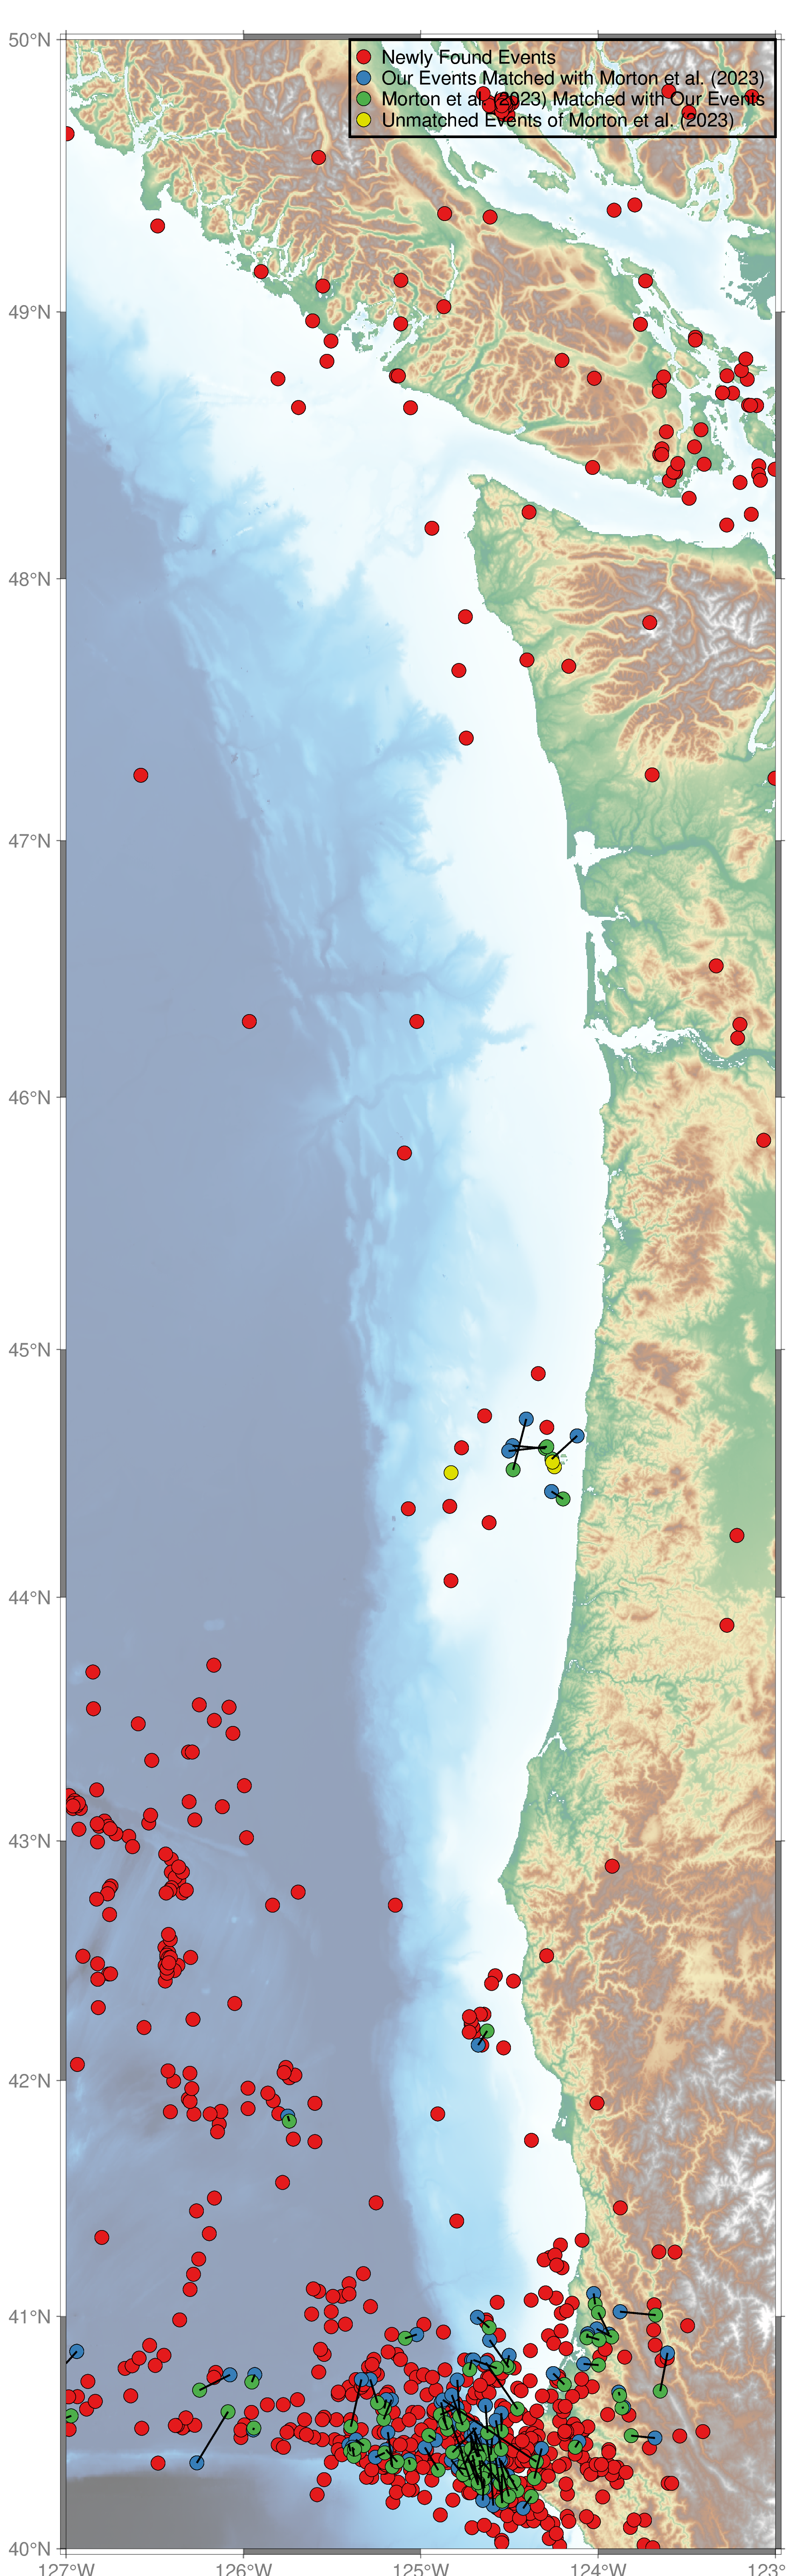

In [51]:
fig = pygmt.Figure()

# Load grid data
grid = pygmt.datasets.load_earth_relief(resolution="15s", region=[-127, -123, 40, 50])

# Plot the grid image
fig.grdimage(grid=grid, projection="M15c", frame=['a', "+tMatched and Unmatched Events"], cmap="geo", transparency=50)

# Plotting data points
fig.plot(x=unmatched_events_mycatalog['longitude'], y=unmatched_events_mycatalog['latitude'],  
         style="c0.3c", color='#e41a1c', pen="black", label='Newly Found Events')
fig.plot(x=matched_events_mycatalog['longitude'], y=matched_events_mycatalog['latitude'],  
         style="c0.3c", color='#377eb8', pen="black", label='Our Events Matched with Morton et al. (2023)')
fig.plot(x=matched_events_morton['LON'], y=matched_events_morton['LAT'],  
         style="c0.3c", color='#4daf4a', pen="black", label='Morton et al. (2023) Matched with Our Events')
fig.plot(x=unmatched_events_morton['LON'], y=unmatched_events_morton["LAT"],  
         style="c0.3c", color='#dede00', pen="black", label='Unmatched Events of Morton et al. (2023)')

# Plot lines between matched events
for i in range(len(matched_events_mycatalog)):
    fig.plot(
        x=[matched_events_morton.iloc[i]['LON'], matched_events_mycatalog.iloc[i]['longitude']],
        y=[matched_events_morton.iloc[i]['LAT'], matched_events_mycatalog.iloc[i]['latitude']],
        pen="1p,black"
    )

# Add a legend to the plot
fig.legend(position="JTR+w9+jTR", box=True)

# Display the figure
fig.show()



## First map on the poster

In [10]:
t1 = pd.Timestamp('2012-10-01 00:00:00.000000+0000', tz='UTC')
t2 = pd.Timestamp('2012-10-31 23:59:59.999999+0000', tz='UTC')

## Load Data from Ian Stone's Paper

In [11]:
events_cascadia = pd.read_csv("../data/jgrb52524-sup-0003-2017jb014966-ds02.csv", header = None, skiprows = 1,
              names = ["Timestamp", "Longitude", "Latitude", "Depth (km)", "RMS (s)", "CI Year"])

# Convert epoch times to timestamps and ensure timezone awareness
events_cascadia['Time (epoch)'] = events_cascadia['Timestamp'].apply(
    lambda x: pd.Timestamp(datetime.datetime.utcfromtimestamp(x), tz='UTC'))
events_cascadia_201210 = events_cascadia.loc[(events_cascadia['Time (epoch)'] > t1) & (events_cascadia['Time (epoch)'] < t2) ]
events_cascadia_201210

Timestamp  Longitude  Latitude  Depth (km)  RMS (s)  CI Year  \
260  1349443647  -125.3283   41.1876     34.7942   0.3335        2   
261  1349482398  -126.4830   44.0203     28.5039   0.0488        2   
262  1349516866  -125.7461   41.5225      0.0000   1.7281        2   
263  1349805892  -126.0061   41.9740     25.1583   1.0203        2   
264  1350030627  -125.6299   41.0759     25.6239   0.5286        2   
265  1350559468  -125.2046   40.9325     70.0578   1.1996        2   

                 Time (epoch)  
260 2012-10-05 13:27:27+00:00  
261 2012-10-06 00:13:18+00:00  
262 2012-10-06 09:47:46+00:00  
263 2012-10-09 18:04:52+00:00  
264 2012-10-12 08:30:27+00:00  
265 2012-10-18 11:24:28+00:00

In [12]:
events_cascadia_201210_lat = events_cascadia_201210['Latitude']
events_cascadia_201210_lon = events_cascadia_201210['Longitude']

In [13]:
# Read the CSV file
events_jdf = pd.read_csv("../data/jgrb52524-sup-0002-2017jb014966-ds01.csv")

# Convert 'yyyy/mm/dd' column to Timestamp
events_jdf['yyyy/mm/dd'] = events_jdf['yyyy/mm/dd'].apply(
    lambda x: pd.Timestamp(datetime.datetime.strptime(x, "'%Y/%m/%d'"), tz='UTC'))

# Filter events based on time boundaries
events_jdf_201210 = events_jdf.loc[(events_jdf['yyyy/mm/dd'] > t1) & (events_jdf['yyyy/mm/dd'] < t2)]

# # Reset the index after filtering
# events_jdf_201210.reset_index(drop=True, inplace=True)

# Output the filtered DataFrame
events_jdf_201210

yyyy/mm/dd    hh:MM:ss.ff   Latitude   Longitude  \
57 2012-10-09 00:00:00+00:00  '11:17:43.95'  42.140000 -124.596833   
58 2012-10-10 00:00:00+00:00  '23:26:18.42'  44.595667 -124.280333   
59 2012-10-13 00:00:00+00:00  '10:11:36.78'  41.228167 -124.252500   
60 2012-10-16 00:00:00+00:00  '06:22:47.35'  42.206833 -124.649667   
61 2012-10-16 00:00:00+00:00  '11:51:43.28'  42.259667 -124.666500   
62 2012-10-17 00:00:00+00:00  '03:50:15.51'  40.966333 -124.689833   
63 2012-10-18 00:00:00+00:00  '09:25:55.67'  42.253000 -124.682167   
64 2012-10-20 00:00:00+00:00  '10:19:40.35'  42.678000 -124.725333   
65 2012-10-24 00:00:00+00:00  '02:08:17.58'  42.137000 -124.661833   
66 2012-10-27 00:00:00+00:00  '02:26:47.61'  42.246667 -124.650000   

    Depth (km)  Magnitude  # Nonzero Phase Arrivals  RMS (s)  \
57       10.54       0.97                         7     0.70   
58       21.40       1.81                        14     0.22   
59        8.98       0.83                        10     0.40   
60        7.59       2.22                        15     0.37   
61        7.23       1.01                         9     0.27   
62       30.34       2.62                        11     0.16   
63        8.90       1.67                        13     0.42   
64       16.78       0.88                         6     1.78   
65       17.46       0.74                         7     0.31   
66        6.60       0.79                         7     0.19   

    Max Azimuthal Gap  Distance to nearest station (km)  \
57                194                              29.3   
58                 95                              18.9   
59                 86                               9.9   
60                 77                              24.6   
61                168                              24.6   
62                 94                               8.7   
63                 82                              23.1   
64                243                              57.8   
65                208                              24.1   
66                163                              25.4   

    horizontal med. st. err.  vertical med. st. err.  depth fixed? (1=yes)  \
57                       4.5                     3.5                     0   
58                       0.5                     0.6                     0   
59                       1.9                     0.8                     0   
60                       0.6                     0.4                     0   
61                       1.3                     0.8                     0   
62                       0.6                     1.3                     0   
63                       0.8                     0.6                     0   
64                      23.2                    33.7                     0   
65                       2.1                    23.2                     1   
66                       2.1                     2.1                     0   

    deployment year  Land Network ID (CNSN=1) Land Network Notes  
57                2                         0          '-'   NaN  
58                2                  60462627       'PNSN'   NaN  
59                2                         0          '-'   NaN  
60                2                  60464892       'PNSN'   NaN  
61                2                         0          '-'   NaN  
62                2                  71860980       'NCSN'   NaN  
63                2                         0          '-'   NaN  
64                2                         0          '-'   NaN  
65                2                         0          '-'   NaN  
66                2                         0          '-'   NaN

In [14]:
events_jdf_201210_lat = events_cascadia_201210['Latitude']
events_jdf_201210_lon = events_cascadia_201210['Longitude']

In [15]:
events_stone_201210_lat = pd.concat([events_jdf_201210_lat, events_cascadia_201210_lat])
events_stone_201210_lon = pd.concat([events_jdf_201210_lon, events_cascadia_201210_lon])

## Load Data from Morton's Paper

In [16]:
# Read Morton's catalog
events_morton = pd.read_csv('../data/ds01.csv')
events_morton['datetime'] = pd.to_datetime(events_morton['TSTRING'], format='%Y%m%d%H%M%S', utc=True)
# Get the events in the Morton catalog that occurred on 10/14/2012

events_morton_201210= events_morton.loc[(events_morton['datetime'] > t1) & (events_morton['datetime'] < t2) ]
# Get the latitudes and longitudes for the events 
events_morton_201210_lon = events_morton_201210['LON']
events_morton_201210_lat = events_morton_201210['LAT']

In [17]:
print(len(events_morton_201210_lat),len(events_morton_201210_lon))

91 91


## Load data from the USGS catalog

In [18]:
# USGS catalog
client = Client("USGS")
# client_waveforms = WaveformClient()
events_USGS_201210 = client.get_events(starttime = UTCDateTime("2012-10-01T00:00:00.000000"),
                  endtime   = UTCDateTime("2012-10-31T23:59:59.999999"),
                  minlatitude=40,minlongitude=-127,maxlatitude=50,maxlongitude=-123)
events_USGS_201210

88 Event(s) in Catalog:
2012-10-31T15:29:52.780000Z | +40.974, -123.700 | 3.21 mw | manual
2012-10-29T16:13:12.370000Z | +48.249, -123.156 | 0.57 md | manual
...
2012-10-02T02:56:59.840000Z | +40.329, -125.431 | 2.78 md | manual
2012-10-02T02:37:36.170000Z | +40.324, -125.394 | 2.79 md | manual
To see all events call 'print(CatalogObject.__str__(print_all=True))'

In [19]:
# Extract latitudes
events_USGS_201210_lat = []
events_USGS_201210_lon =[]
for event in events_USGS:

    origin = event.origins[0] 
    if origin:
        events_USGS_201210_lat.append(origin.latitude)
        events_USGS_201210_lon.append(origin.longitude)

In [20]:
print(len(events_USGS_201210_lat),len(events_USGS_201210_lon))

88 88


## Load Station Information

In [21]:
available_stations = [['7D', 'FS01B'],
 ['7D', 'FS02B'],
 ['7D', 'FS03B'],
 ['7D', 'FS04B'],
 ['7D', 'FS05B'],
 ['7D', 'FS06B'],
 ['7D', 'FS07B'],
 ['7D', 'FS08B'],
 ['7D', 'FS09B'],
 ['7D', 'FS10B'],
 ['7D', 'FS11B'],
 ['7D', 'FS12B'],
 ['7D', 'FS13B'],
 ['7D', 'FS14B'],
 ['7D', 'FS15B'],
 ['7D', 'FS16B'],
 ['7D', 'FS17B'],
 ['7D', 'FS18B'],
 ['7D', 'FS19B'],
 ['7D', 'FS20B'],
 ['7D', 'G02B'],
 ['7D', 'G03B'],
 ['7D', 'G03D'],
 ['7D', 'G04B'],
 ['7D', 'G09B'],
 ['7D', 'G10B'],
 ['7D', 'G11B'],
 ['7D', 'G17B'],
 ['7D', 'G18B'],
 ['7D', 'G19B'],
 ['7D', 'G20B'],
 ['7D', 'G25B'],
 ['7D', 'G26B'],
 ['7D', 'G27B'],
 ['7D', 'G28B'],
 ['7D', 'G33B'],
 ['7D', 'G34B'],
 ['7D', 'G35B'],
 ['7D', 'G36B2'],
 ['7D', 'J09B'],
 ['7D', 'J10B'],
 ['7D', 'J11B'],
 ['7D', 'J17B'],
 ['7D', 'J18B'],
 ['7D', 'J19B'],
 ['7D', 'J25B'],
 ['7D', 'J27B'],
 ['7D', 'J33B'],
 ['7D', 'M09B'],
 ['7D', 'M10B'],
 ['7D', 'M11B'],
 ['7D', 'M12B'],
 ['7D', 'M13B'],
 ['7D', 'M14B'],
 ['7D', 'M18B'],
 ['BK', 'JCC'],
 ['CN', 'BTB'],
 ['CN', 'LZB'],
 ['CN', 'MGB'],
 ['CN', 'NLLB'],
 ['CN', 'OZB'],
 ['CN', 'PFB'],
 ['CN', 'PGC'],
 ['CN', 'SHB'],
 ['CN', 'SNB'],
 ['CN', 'VGZ'],
 ['CN', 'YOUB'],
 ['NC', 'KBO'],
 ['NC', 'KCT'],
 ['NC', 'KEB'],
 ['NC', 'KHBB'],
 ['NC', 'KHMB'],
 ['NC', 'KMPB'],
 ['NC', 'KMR'],
 ['NC', 'KRMB'],
 ['NC', 'KRP'],
 ['NC', 'KSXB'],
 ['NV', 'NC89'],
 ['NV', 'NCBC'],
 ['TA', 'D03D'],
 ['TA', 'F04D'],
 ['TA', 'G03D'],
 ['TA', 'I02D'],
 ['TA', 'I03D'],
 ['TA', 'J01D'],
 ['TA', 'J01E'],
 ['TA', 'K02D'],
 ['TA', 'L02D'],
 ['TA', 'L02E'],
 ['UO', 'DBO'],
 ['UW', 'BABR'],
 ['UW', 'FISH'],
 ['UW', 'FORK'],
 ['UW', 'JEDS'],
 ['UW', 'LEBA'],
 ['UW', 'LRIV'],
 ['UW', 'OFR'],
 ['UW', 'RADR'],
 ['UW', 'TAKO'],
 ['UW', 'WISH'],
 ['X9', 'BB030'],
 ['X9', 'BB060'],
 ['X9', 'BB070'],
 ['X9', 'BB090']]

In [22]:
# Obtain the latitudes of longitude of the stations used
client = Client("IRIS")

sta_7D_lat = []
sta_7D_lon = []
other_sta_lat = []
other_sta_lon = []
for network, station in available_stations:

    # Fetch the station inventory
    inventory = client.get_stations(network=network, station=station, level='station')

    # The correct path to access the station's latitude and longitude
    sta_lat = inventory[0][0].latitude
    sta_lon = inventory[0][0].longitude

    # Check if the station belongs to network '7D'
    if network == '7D':
        sta_7D_lat.append(sta_lat)
        sta_7D_lon.append(sta_lon)
    else:
        other_sta_lat.append(sta_lat)
        other_sta_lon.append(sta_lon)



In [23]:
len(sta_7D_lat), len(other_sta_lat)

(55, 49)

## Plot the events

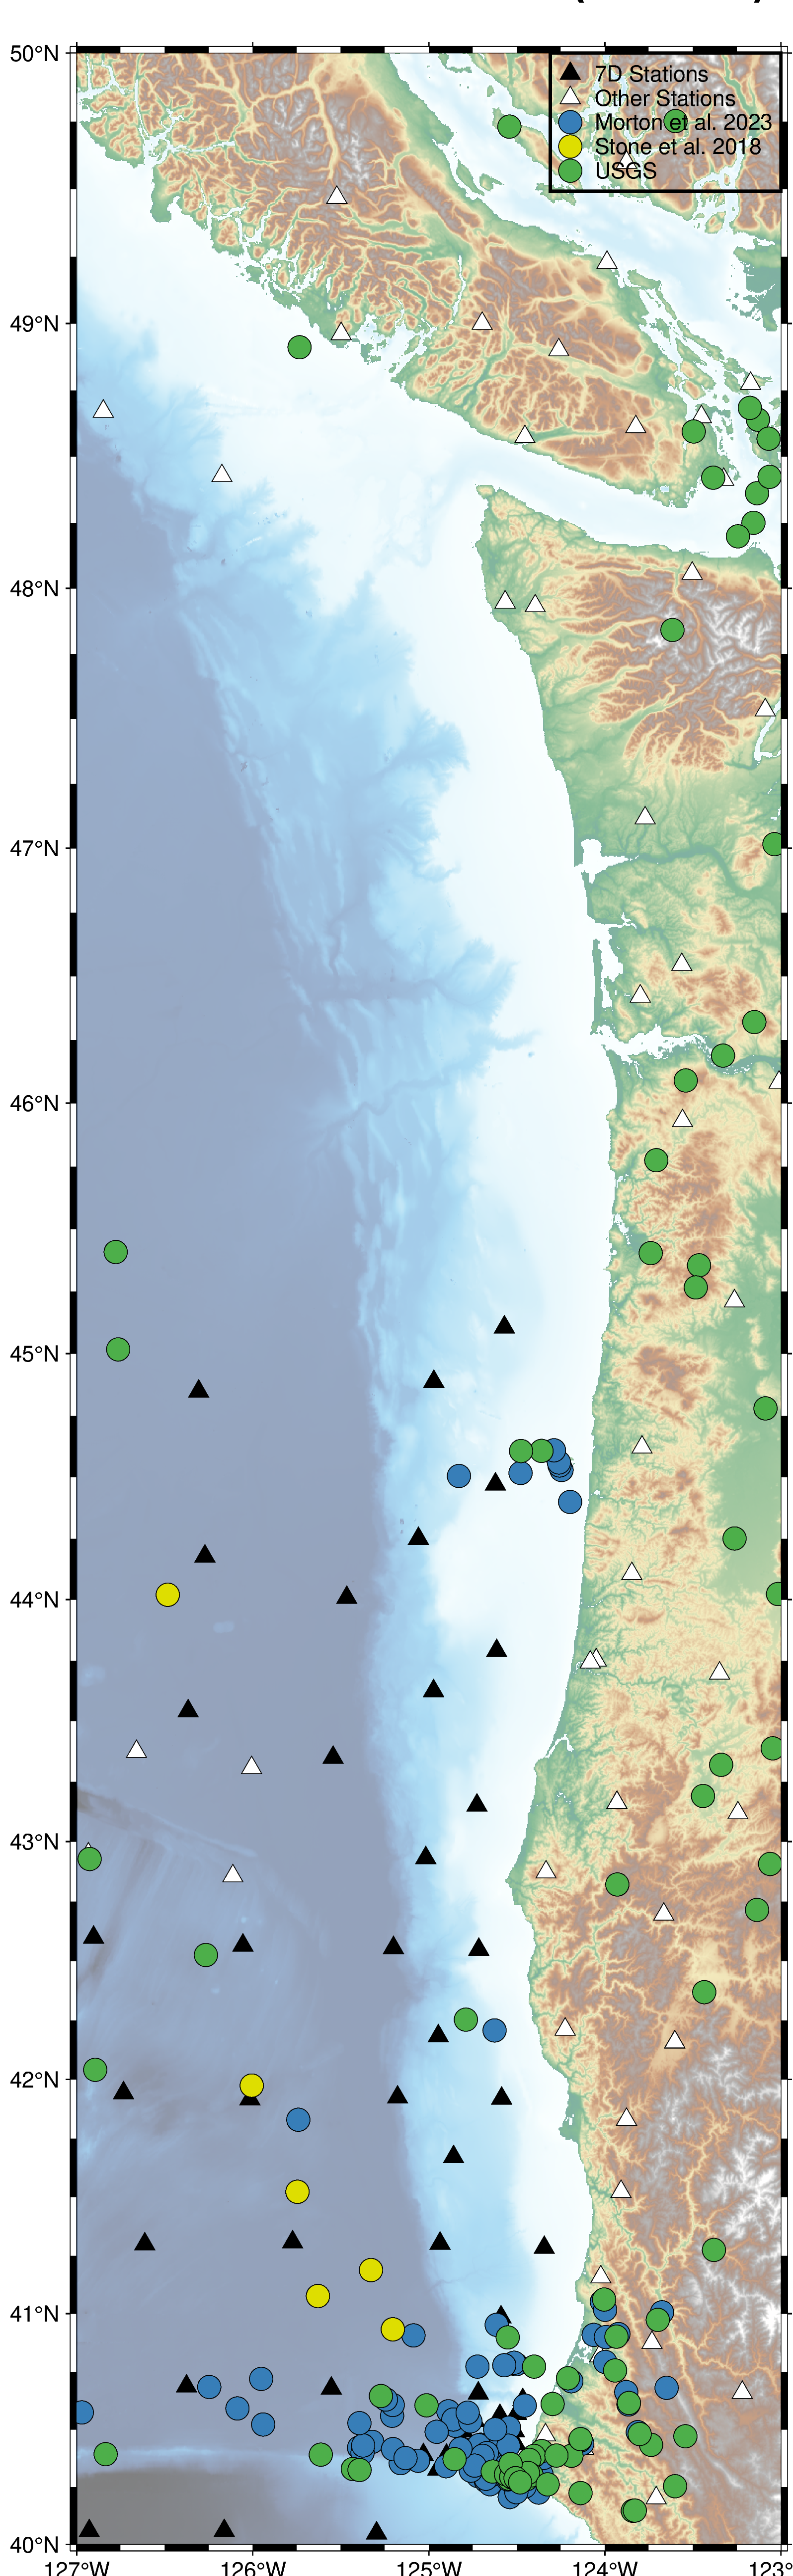

In [28]:
import pygmt

fig = pygmt.Figure()
# Load grid data
grid = pygmt.datasets.load_earth_relief(resolution="15s", region=[-127, -123, 40, 50])
# Define target region
region = [-127, -123, 40, 50]
title = "Main roads of O`ahu (Hawai`i)"  # Approximating the Okina letter ʻ with `
fig.basemap(region=region, projection="M12c", frame=["af", f"WSne+t{title}"])
fig.grdimage(grid=grid, cmap="geo", transparency=50)

# Adjust plot calls to use 'style' correctly
# PLot the stations
fig.plot(x=sta_7D_lon, y=sta_7D_lat,  
         fill='black', style="t0.4c", pen="black", label="7D Stations")
fig.plot(x=other_sta_lon, y=other_sta_lat,  
         fill='white', style="t0.4c", pen="black", label="Other Stations")

# Plot the events
fig.plot(x=events_morton_201210_lon, y=events_morton_201210_lat,  
         fill='#377eb8', style="c0.4c", pen="black", label="Morton et al. 2023")
fig.plot(x=events_stone_201210_lon, y=events_stone_201210_lat,  
         fill='#dede00', style="c0.4c", pen="black", label="Stone et al. 2018")
fig.plot(x=events_USGS_201210_lon, y=events_USGS_201210_lat,  
         fill='#4daf4a', style="c0.4c", pen="black", label="USGS")

# Add a legend to the plot
fig.legend(position="JTR+jTR", box=True)  

# Show the figure
fig.show()

In [ ]:
import pygmt

fig = pygmt.Figure()

# Define target region
region = [-127, -123, 40, 46]
title = "Main roads of O`ahu (Hawai`i)"  # Approximating the Okina letter ʻ with `
fig.basemap(region=region, projection="M12c", frame=["af", f"WSne+t{title}"])
fig.grdimage(grid=grid, cmap="geo", transparency=50)

# Adjust plot calls to use 'style' correctly
fig.plot(x=events_morton_201210_lon, y=events_morton_201210_lat,  
         fill='#377eb8', style="c0.4c", pen="black", label="Morton et al. 2023")
fig.plot(x=events_stone_201210_lon, y=events_stone_201210_lat,  
         fill='#dede00', style="c0.4c", pen="black", label="Stone et al. 2018")
fig.plot(x=events_USGS_201210_lon, y=events_USGS_201210_lat,  
         fill='#4daf4a', style="c0.4c", pen="black", label="USGS")

# Add a legend to the plot
fig.legend(position="JTR+jTR", box=True)  

# Show the figure
fig.show()